In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

/mnt/ShareDrive/Development/UzK/COINs-CNN-FLOW/Uvenv/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
flow_predictions = pd.read_csv('../data/yt_analysis/results.csv')
flow_predictions['VID'] = flow_predictions.FILE.apply(lambda x: x.split('_')[0].split('/')[-1])
flow_predictions['FRAME'] = flow_predictions.FILE.apply(lambda x: x.split('_')[-4])
flow_predictions['FLOW'] = flow_predictions.FILE.apply(lambda x: int(x.split('_')[-2]))
flow_predictions.drop(columns=['FILE'], inplace=True)
flow_predictions.head(5)


,PROB,VID,FRAME,FLOW
0,0.458575,34,5351,0
1,0.465284,40,4990,0
2,0.615181,57,1063,0
3,0.368367,9,2884,0
4,0.740763,51,10423,0


In [5]:
fpr, tpr, _ = roc_curve(flow_predictions_irr.FLOW.to_numpy(), flow_predictions_irr.PROB.to_numpy())
roc_auc = auc(fpr, tpr)

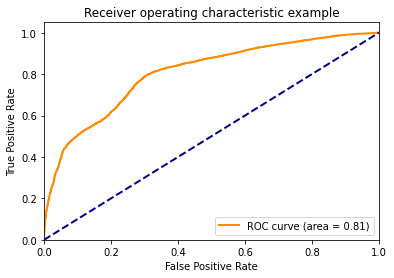

In [6]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<AxesSubplot:xlabel='FLOW', ylabel='PROB'>

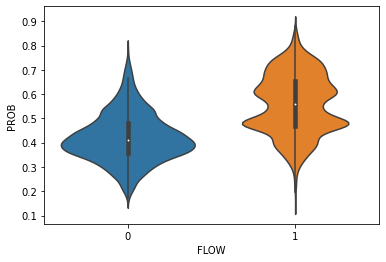

In [7]:
sns.violinplot(data=flow_predictions_irr, x='FLOW', y='PROB')

In [28]:
flow_predictions_irr.loc[flow_predictions_irr['PROB'] >=0.5, 'pred'] = int(1)
flow_predictions_irr.loc[flow_predictions_irr['PROB'] < 0.5, 'pred'] = int(0)

In [29]:
flow_predictions_irr['acc'] = flow_predictions_irr['FLOW'] == flow_predictions_irr['pred'].astype('int')

In [22]:
flow_predictions_irr['acc'].value_counts()

True     11362
False     4674
Name: acc, dtype: int64

In [30]:
sum(flow_predictions_irr['acc'])/len(flow_predictions_irr)

0.7085308056872038